<a href="https://colab.research.google.com/github/rmallela26/Lane_Departure_Detection/blob/main/Driving_Qaulity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/IrohXu/lanenet-lane-detection-pytorch.git

Cloning into 'lanenet-lane-detection-pytorch'...
remote: Enumerating objects: 262, done.
remote: Counting objects: 100% (262/262), done.
remote: Compressing objects: 100% (139/139), done.
remote: Total 262 (delta 121), reused 242 (delta 121), pack-reused 0
Receiving objects: 100% (262/262), 20.37 MiB | 15.09 MiB/s, done.
Resolving deltas: 100% (121/121), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install -q kaggle
!pip install -q kaggle-cli

Mounted at /content/drive
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.2/147.2 kB 15.9 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for lxml
ERROR: Could not build wheels for lxml, which is required to install pyproject.toml-based pr

In [ ]:
!kaggle datasets download -d manideep1108/tusimple

100% 21.6G/21.6G [03:27<00:00, 117MB/s]
100% 21.6G/21.6G [03:27<00:00, 112MB/s]


In [ ]:
!unzip ./tusimple.zip


Streaming output truncated to the last 5000 lines.
  inflating: TUSimple/train_set/seg_label/0313-2/115/20.png  
  inflating: TUSimple/train_set/seg_label/0313-2/1150/20.png  
  inflating: TUSimple/train_set/seg_label/0313-2/11520/20.png  
  inflating: TUSimple/train_set/seg_label/0313-2/1155/20.png  
  inflating: TUSimple/train_set/seg_label/0313-2/11580/20.png  
  inflating: TUSimple/train_set/seg_label/0313-2/1160/20.png  
  inflating: TUSimple/train_set/seg_label/0313-2/11640/20.png  
  inflating: TUSimple/train_set/seg_label/0313-2/1165/20.png  
  inflating: TUSimple/train_set/seg_label/0313-2/1170/20.png  
  inflating: TUSimple/train_set/seg_label/0313-2/11700/20.png  
  inflating: TUSimple/train_set/seg_label/0313-2/1175/20.png  
  inflating: TUSimple/train_set/seg_label/0313-2/11760/20.png  
  inflating: TUSimple/train_set/seg_label/0313-2/1180/20.png  
  inflating: TUSimple/train_set/seg_label/0313-2/11820/20.png  
  inflating: TUSimple/train_set/seg_label/0313-2/1185/20.png  

In [ ]:
!python tusimple_transform.py --src_dir ./TUSimple --val False

1503
['42300', '29940', '37480', '36660', '34400', '1610', '415', '38700', '40560', '13140', '40680', '37780', '38400', '1325', '38080', '62340', '11040', '25200', '38520', '4380', '1655', '19740', '30480', '37600', '28200', '41560', '40740', '1265', '1615', '31920', '33520', '1330', '175', '760', '370', '13200', '580', '1500', '290', '36080', '60240', '1660', '1770', '2760', '21060', '300', '35440', '22380', '61440', '27480', '10020', '42620', '1540', '38680', '35800', '34520', '750', '37700', '22680', '35140', '695', '485', '23160', '12780', '33500', '6960', '9000', '975', '38880', '36580', '41920', '1600', '520', '38980', '36900', '19140', '345', '27300', '970', '1280', '24540', '1980', '35760', '16620', '330', '39120', '1180', '24300', '11220', '535', '15960', '1730', '20820', '1560', '40200', '11400', '21900', '36740', '1695', '24000', '38800', '32480', '36680', '29520', '37000', '845', '36620', '34700', '40960', '59040', '1455', '875', '28260', '40020', '63660', '36700', '740', '

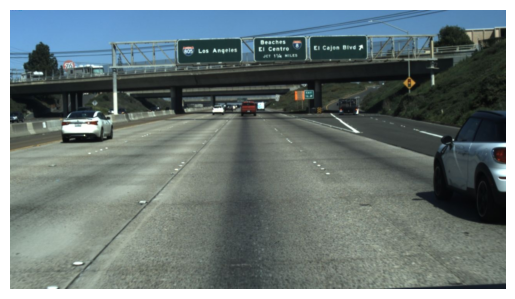

In [ ]:
from operator import length_hint
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

directory = './TUSimple/train_set/clips/0313-2/'

# Get the list of files in the directory
files = os.listdir(directory)
print(len(files))
print(files)
print(os.listdir(directory+'42300'))
img = mpimg.imread(directory+'42300/'+os.listdir(directory+'42300')[0])
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()

In [ ]:
from operator import length_hint
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

directory = './TUSimple/train_set/clips/0313-2/'

# Get the list of files in the directory
files = os.listdir(directory)
print(files)

for file in files:
  dir = directory + file
  print(dir)
  newfiles = os.listdir(dir)
  image_files = [f for f in newfiles if f.endswith('.jpg')]
  print(len(image_files))
  if image_files:
    # Get the path of the first image
    first_image_path = os.path.join(dir, image_files[0])

    # Display the first image
    img = mpimg.imread(first_image_path)
    plt.imshow(img)
    plt.axis('off')  # Turn off axis
    plt.show()



In [ ]:
import torch

In [ ]:
%cd lanenet-lane-detection-pytorch/
model = torch.load('./log/best_model.pth')

/content/lanenet-lane-detection-pytorch


In [ ]:
%cd lanenet-lane-detection-pytorch/

/content/lanenet-lane-detection-pytorch


In [ ]:
# !python test.py --img ./data/tusimple_test_image/2.jpg
!python test.py --img ./data/tusimple_test_image/Town04_Clear_Noon_09_09_2020_14_57_22_frame_1339.png
# !python test.py --img ./data/tusimple_test_image/0.jpg

# for i in range (0,5):
#   string = './data/tusimple_test_image/' + str(i) + '.jpg'
#   !python test.py --img $string

# ./data/tusimple_test_image/2.jpg

Use ENet as backbone


In [ ]:
#take all the images in some folder, run the bit map, save in another folder
import shutil
import os

old = '../drive/MyDrive/LaneData/'
new = '../dq_train_bitmap/'

files = os.listdir(old)
print(files)
print(len(files))

for file in files:
  if file.endswith('.png'):
    #move the files from the output directory to where I want
    #located in ./test_output/binary_output.jpg
    path = old + file
    !python test.py --img $path
    shutil.copy('./test_output/binary_output.jpg', new + file)
    # break



['1492729141930774664.png', '1492638328853905039.png', '1492722737804178131.png', '1492630190347529487.png', '1492637998352388465.png', '1492635232381767419.png', '1492629756141816200.png', '1492627348130955659.png', '1492639024564788319.png', '1492628790557626803.png', '1492639027562951620.png', '1492638422361651701.png', '1492629901388591858.png', '1492629738850939874.png', '1492635042695846183.png', '1492638230279856110.png', '1492627678297717237.png', '1492634855608353415.png', '1492629839556671233.png', '1492636556687326504.png', '1492729584996126355.png', '1492629602933133471.png', '1492627514463544781.png', '1492637471138146892.png', '1492639019001427791.png', '1492626487919028170.png', '1492626688464435547.png', '1492721976791984959.png', '1492721471729956555.png', '1492729247332276170.png', '1492634566082691858.png', '1492638387249489975.png', '1492629460252599526.png', '1492634973437855831.png', '1492729148924681775.png', '1492636974602990297.png', '1492638756126904712.png', 

In [ ]:
!zip -r /content/file.zip /content/dq_train_bitmap/
from google.colab import files
files.download("/content/file.zip")

  adding: content/dq_train_bitmap/ (stored 0%)
  adding: content/dq_train_bitmap/1492629829864793301.png (deflated 19%)
  adding: content/dq_train_bitmap/1492721976791984959.png (deflated 15%)
  adding: content/dq_train_bitmap/1492722737804178131.png (deflated 15%)
  adding: content/dq_train_bitmap/1492638494851376715.png (deflated 15%)
  adding: content/dq_train_bitmap/1494453829459036893.png (deflated 16%)
  adding: content/dq_train_bitmap/1492629901388591858.png (deflated 15%)
  adding: content/dq_train_bitmap/1320.png (deflated 15%)
  adding: content/dq_train_bitmap/1492639024564788319.png (deflated 16%)
  adding: content/dq_train_bitmap/1494453635544157546.png (deflated 17%)
  adding: content/dq_train_bitmap/1494453243716564334.png (deflated 16%)
  adding: content/dq_train_bitmap/1492722104048648766.png (deflated 17%)
  adding: content/dq_train_bitmap/1495492608617071556.png (deflated 13%)
  adding: content/dq_train_bitmap/1492626487919028170.png (deflated 18%)
  adding: content/d

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#implement convnet
import torch
import numpy as np
import pandas as pd
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision import datasets
from torchsummary import summary

batch_size = 5

class Net(torch.nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1 = torch.nn.Conv2d(1, 10, kernel_size=3)
    self.conv2 = torch.nn.Conv2d(10, 20, kernel_size=3)
    self.conv3 = torch.nn.Conv2d(20, 30, kernel_size=3)
    self.pooling1 = torch.nn.MaxPool2d(4)
    self.pooling2 = torch.nn.MaxPool2d(2)
    self.fc1 = torch.nn.Linear(2520, 100)
    self.fc2 = torch.nn.Linear(100, 3)
    # self.fc3 = torch.nn.Linear(500, 3)
    self.relu = torch.nn.ReLU()

  def forward(self,x):
    batch_size = x.size(0)
    x = self.pooling1(self.relu(self.conv1(x)))
    x = self.pooling1(self.relu(self.conv2(x)))
    x = self.pooling2(self.relu(self.conv3(x)))
    x = x.view(batch_size,-1)
    x = self.relu(self.fc1(x))
    # x = self.relu(self.fc2(x))
    x = self.fc2(x)
    return x

model = Net()
summary(model, input_size=(1,256,512))
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)


criterion = torch.nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 10, 254, 510]             100
              ReLU-2         [-1, 10, 254, 510]               0
         MaxPool2d-3          [-1, 10, 63, 127]               0
            Conv2d-4          [-1, 20, 61, 125]           1,820
              ReLU-5          [-1, 20, 61, 125]               0
         MaxPool2d-6           [-1, 20, 15, 31]               0
            Conv2d-7           [-1, 30, 13, 29]           5,430
              ReLU-8           [-1, 30, 13, 29]               0
         MaxPool2d-9            [-1, 30, 6, 14]               0
           Linear-10                  [-1, 100]         252,100
             ReLU-11                  [-1, 100]               0
           Linear-12                    [-1, 3]             303
Total params: 259,753
Trainable params: 259,753
Non-trainable params: 0
-------------------------------

(137, 2)
{1492729141930774664: 0, 1492638328853905039: 0, 1492630190347529487: 0, 1492722737804178131: 0, 1492637998352388465: 0, 1492635232381767419: 0, 1492629756141816200: 0, 1492627348130955659: 2, 1492639024564788319: 2, 1492628790557626803: 1, 1492639027562951620: 1, 1492638422361651701: 1, 1492629901388591858: 0, 1492629738850939874: 1, 1492635042695846183: 1, 1492638230279856110: 1, 1492627678297717237: 0, 1492634855608353415: 1, 1492629839556671233: 1, 1492636556687326504: 1, 1492729584996126355: 2, 1492629602933133471: 1, 1492627514463544781: 0, 1492637471138146892: 0, 1492639019001427791: 1, 1492626487919028170: 0, 1492626688464435547: 0, 1492721976791984959: 0, 1492721471729956555: 1, 1492729247332276170: 0, 1492634566082691858: 0, 1492638387249489975: 1, 1492629460252599526: 0, 1492634973437855831: 0, 1492729148924681775: 2, 1492636974602990297: 2, 1492638756126904712: 2, 1492628445267402258: 1, 1492729265190159870: 1, 1492722407536001522: 2, 1492638494851376715: 1, 149263

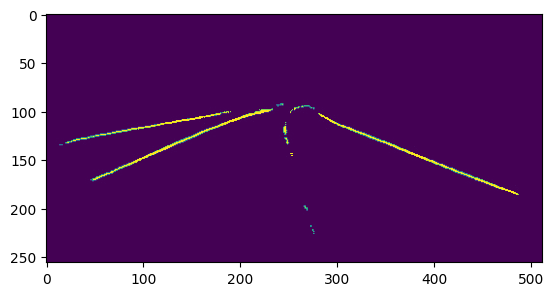

In [ ]:
#train test split

from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision import datasets
import numpy as np
import os
import torch
import matplotlib.pyplot as plt

#LABELS NOT WORKING
#NEEDS TO BE ORDERED IN THE SAME ORDER AS THE DATA
#NEED TO ORDER IT

images = os.listdir('./drive/MyDrive/dq_train_bitmap')
labels = np.loadtxt('./dq_labels.csv',delimiter=',',dtype=np.int_,skiprows=1)
print(labels.shape)
dictionary = {row[0]: row[1] for row in labels}
print(dictionary)

ordered_labels = []

from PIL import Image
import torchvision.transforms as transforms

#convert images to tensors
data = []

for image in images:
  img = Image.open('./drive/MyDrive/dq_train_bitmap/' + image)
  transform = transforms.Compose([
      transforms.PILToTensor()
  ])

  img_tensor = transform(img)
  data.append(img_tensor)
  ordered_labels.append(dictionary.get(int(image[:-4])))

# torch.set_printoptions(profile='full')
print(len(data))
print(len(ordered_labels))
labels = ordered_labels
plt.imshow(data[7].permute(1, 2, 0))
print(labels)

data = torch.stack(data, dim=0)
print(data.shape)

print(data[0])

class LaneDataset(Dataset):
  def __init__(self):
      self.len = 120
      self.x_data = data[:120]
      print(self.x_data.shape)
      self.y_data = labels[:120]

  def __getitem__(self, index):
      return self.x_data[index]/255.0,self.y_data[index]

  def __len__(self):
      return self.len

dataset = LaneDataset()
print(dataset.__getitem__(0))
train_loader = DataLoader(dataset=dataset, batch_size=5, shuffle=True)

class testDataSet(Dataset):
  def __init__(self):
    self.len = 17
    self.x_data = data[120:]
    print(self.x_data.shape)
    self.y_data = labels[120:]

  def __getitem__(self, index):
    return self.x_data[index]/255.0,self.y_data[index]

  def __len__(self):
    return self.len

testset = testDataSet()
test_loader = DataLoader(dataset=testset, batch_size=5, shuffle=True)

In [ ]:
epochs = 30
train_mse = []

for epoch in range(epochs):
  running_loss = 0
  for itr, (image, label) in enumerate(train_loader):
    image,label = image.to(device),label.to(device)
    optimizer.zero_grad()
    outputs = model(image)
    loss = criterion(outputs, label)
    running_loss += loss.item()
    loss.backward()
    optimizer.step()
  train_mse.append(running_loss)
  if (epoch+1) % 3 == 0:
      print(f'epoch: {epoch+1}, loss: {running_loss:.4f}')



epoch: 3, loss: 11.5554
epoch: 6, loss: 7.8446
epoch: 9, loss: 5.3062
epoch: 12, loss: 4.6112
epoch: 15, loss: 2.3441
epoch: 18, loss: 0.9065
epoch: 21, loss: 0.8134
epoch: 24, loss: 0.2867
epoch: 27, loss: 0.0943
epoch: 30, loss: 0.0346


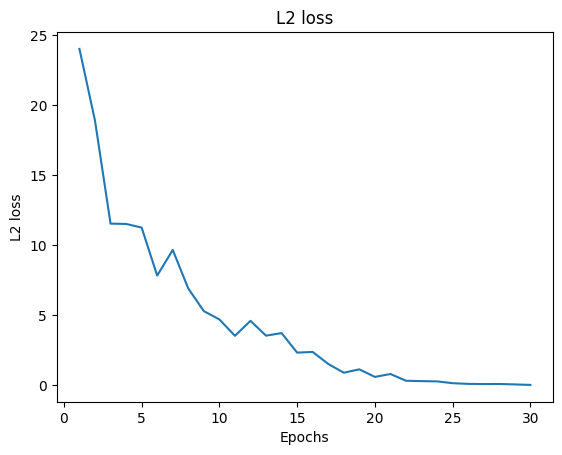

In [ ]:
plt.plot(np.linspace(1, 30, 30), train_mse, label='Train')
plt.title('L2 loss')
plt.xlabel('Epochs')
plt.ylabel('L2 loss')
plt.show()

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for itr, (image, label) in enumerate(test_loader):
        # image = image.view(image.shape[0], -1)
        outputs = model(image)
        _, predicted = torch.max(outputs.data, 1)
        correct += predicted.eq(label.reshape(len(label),)).sum()
        total += float(len(label))

        for i, (pred_class, true_label) in enumerate(zip(predicted.tolist(), label.tolist())):
            print(f"Image {itr * test_loader.batch_size + i + 1}: Predicted class: {pred_class}, True label: {true_label}")
    accuracy = correct / total
    print(f'Accuracy of Neural Network is {accuracy:.4f}')

Image 1: Predicted class: 0, True label: 0
Image 2: Predicted class: 2, True label: 2
Image 3: Predicted class: 0, True label: 0
Image 4: Predicted class: 1, True label: 1
Image 5: Predicted class: 1, True label: 1
Image 6: Predicted class: 1, True label: 0
Image 7: Predicted class: 0, True label: 0
Image 8: Predicted class: 2, True label: 2
Image 9: Predicted class: 1, True label: 0
Image 10: Predicted class: 1, True label: 1
Image 11: Predicted class: 0, True label: 0
Image 12: Predicted class: 1, True label: 1
Image 13: Predicted class: 1, True label: 1
Image 14: Predicted class: 0, True label: 0
Image 15: Predicted class: 1, True label: 1
Image 16: Predicted class: 0, True label: 0
Image 17: Predicted class: 1, True label: 1
Accuracy of Neural Network is 0.8824
